<a href="https://colab.research.google.com/github/adeyeyesaidah/googleplaystore/blob/main/GOOGLE_PLAY_STORE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Google Play Store apps and reviews

# import library

In [ ]:
# we imported our Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
url = 'https://github.com/adeyeyesaidah/googleplaystore/blob/main/googleplaystore.csv?raw=true'

#Read in the csv file as a dataframe called df


In [ ]:
df = pd.read_csv(url)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#check for missing values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
#check for the total number of Apps in the dataset
print ('Total number of apps in the dataset = ', len(df))

Total number of apps in the dataset =  10841


In [ ]:
#check for duplicate values
df.duplicated().sum()

483

In [ ]:
#remove duplicate values
df= df.drop_duplicates()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#the total number of app after removing duplicate values
print ('Total number of apps in the dataset = ', len(df))

Total number of apps in the dataset =  10358


In [ ]:
# checking for a random sample of the dataset
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4666,Be U Salons Hair-Beauty Deals In Delhi & Banga...,LIFESTYLE,4.0,889,16M,"100,000+",Free,0,Everyone,Lifestyle,"August 2, 2018",1.1.4.38,4.2 and up
2127,Toca Kitchen 2,FAMILY,4.5,1014846,56M,"50,000,000+",Free,0,Everyone,Educational;Pretend Play,"June 29, 2017",1.2.3-play,4.1 and up
6634,gardening ideas flower diy,HOUSE_AND_HOME,NaN,0,5.6M,100+,Free,0,Everyone,House & Home,"May 29, 2017",1.0,2.3 and up
5916,ba,FAMILY,3.1,1734,5.8M,"500,000+",Free,0,Everyone,Strategy,"June 8, 2016",1.0.3,4.0 and up
2954,Collage&Add Stickers papelook,PHOTOGRAPHY,4.0,32896,31M,"5,000,000+",Free,0,Everyone,Photography,"March 14, 2018",3.3.5,2.3.3 and up


In [ ]:
#checking for missing value
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 2. Data cleaning

In [ ]:
#a. Remove special characters from the columns Install and Price

In [ ]:
special_chars = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']

for char in special_chars:
    for cols in cols_to_clean:
        df[cols] = df[cols].apply(lambda x: x.replace(char, ''))

In [ ]:
#b. To confirm special characters have been removed

In [ ]:
#checking the 'Installs' and 'Price' column
df[['Installs', 'Price']]

,Installs,Price
0,10000,0
1,500000,0
2,5000000,0
3,50000000,0
4,100000,0
...,...,...
10836,5000,0
10837,100,0
10838,1000,0
10839,1000,0


In [ ]:
# Print summary of a dataframe

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## #3. Correcting data types


In [ ]:
#To check data type in the original dataset
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#unique value of the installs column
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0', 'Free'],
      dtype=object)

In [ ]:
#replacing the free in the install column to 0
df['Installs'].replace({'Free':0},inplace=True)

In [ ]:
# changing the install column to float data type
df['Installs']= df['Installs'].astype(float)

In [ ]:
#replacing the everyone in the price column to 0
df['Price'].replace({'Everyone':0},inplace=True)

In [ ]:
# changing the install price to float data type
df['Price']= df['Price'].astype(float)

In [ ]:
#changing the info to confirm the type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


### 4. Exploring app categories

In [ ]:
#checking the unique no in the category column
category_no = df['Category'].nunique()
category_no

34

In [ ]:
#checking the Category value counts to know the number of apps in each category and sorting it
app_no= df['Category'].value_counts().sort_values(ascending = False).reset_index()
app_no

,index,Category
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


In [ ]:
#renaming the columns
app_sorted= app_no.rename(columns={"index":"Category","Category":"Count"},inplace=True)
app_sorted

In [ ]:
#droping index 33
app_no = app_no.drop([33])

In [ ]:
app_no

,Category,Count
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


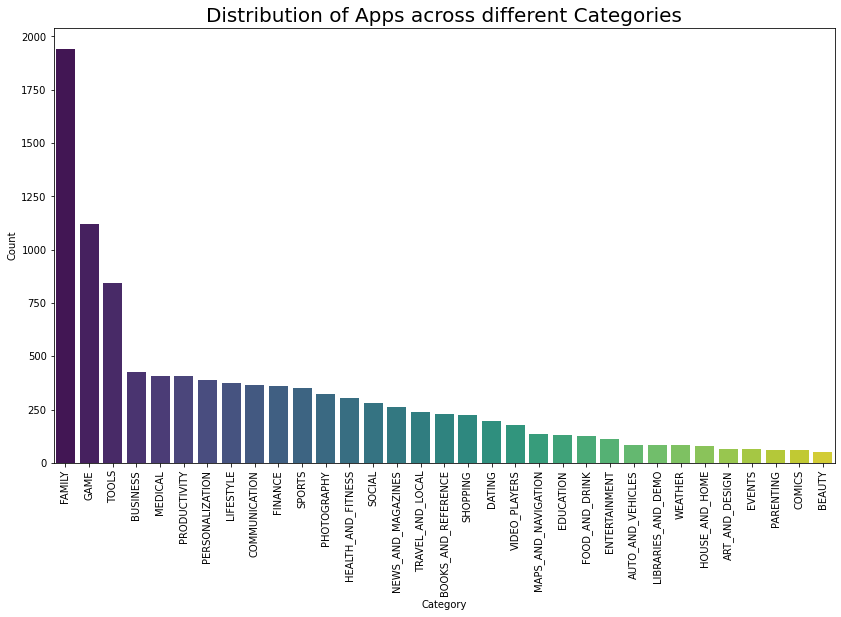

In [ ]:
#ploting Apps against categories
figure = plt.figure(figsize = (14, 8))
plt.xticks(rotation = 90)
title = plt.title('Distribution of Apps across different Categories', color = 'black', fontsize = 20)
sns.barplot(data = app_no, x = 'Category', y = 'Count', palette = 'viridis')
plt.show()

## 5. Distribution of app ratings

In [ ]:
df.corr()

,Rating,Installs,Price
Rating,1.000000,0.048147,-0.021589
Installs,0.048147,1.000000,-0.011146
Price,-0.021589,-0.011146,1.000000


In [ ]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
 df[df['Rating']== '19.']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
# Mean of Rating including the NaN
avr_Rating = df['Rating'].mean()
avr_Rating

4.189542336669291

In [ ]:
#Replacing the NaN with the mean of the rating
#values = avr_Rating
#df['Rating'].fillna(value=values,inplace=True)

In [ ]:
#confirming if the values have been filled
#df['Rating'].isna().sum()

In [ ]:
# the mean of the Rating after changing the NaN value
#ave_app_rating = df['Rating'].mean()
#ave_app_rating


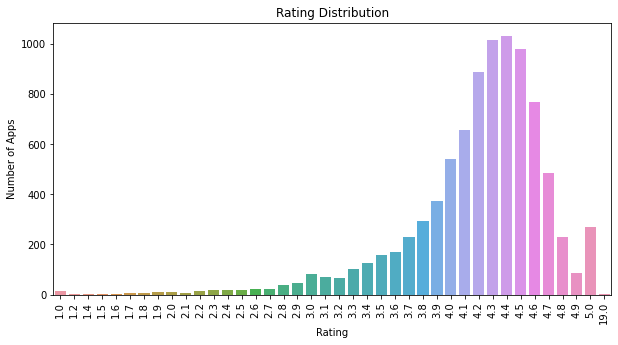

In [ ]:
 #show the distribution of rating
 plt.figure(figsize=(10, 5))
 sns.countplot(x='Rating', data=df)
 plt.title('Rating Distribution')
 plt.xticks(rotation=90)
 plt.ylabel('Number of Apps')
 plt.show()

In [ ]:
#The count plot is skewed to the left indicating that the majority of the apps are highly rated
#with only a few exceptions in the low-rated apps.

## 6.Size and price of an app

In [ ]:
#creating a new df where the NaN ROWS are droped
df_noNaN = df.dropna()
df_noNaN

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#confirming the NaN as been dropped
df_noNaN.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
#categories with atleast 250 apps
large_category  = df_noNaN.groupby('Category').filter(lambda App : len(App) >= 250)
large_category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,10000000.0,Free,0.0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,50000000.0,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,10000000.0,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,5000000.0,Free,0.0,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,1000000.0,Free,0.0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,5000.0,Free,0.0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


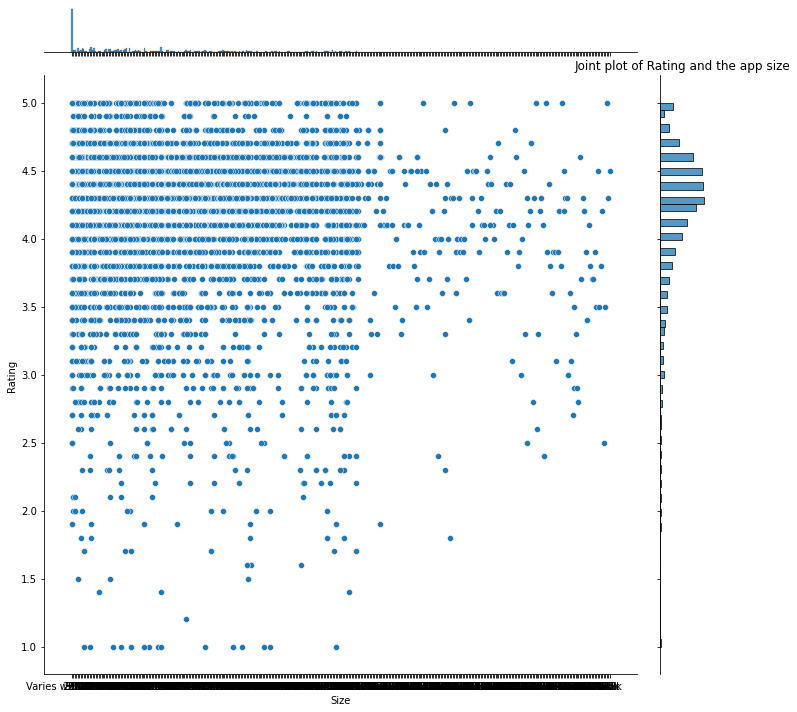

In [ ]:
# Plot size vs. rating
sizevsrating = sns.jointplot(x = large_category['Size'], y = large_category['Rating'],height=10, ratio=9, space=0.5,)
plt.title('Joint plot of Rating and the app size')
plt.show()

In [ ]:
#creating a df called paid app to show the apps that are paid for
paid_app =df_noNaN[df_noNaN['Type']=='Paid']
paid_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000.0,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000.0,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,1000.0,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,5.0,5,861k,100.0,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10697,Mu.F.O.,GAME,5.0,2,16M,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000.0,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,10000.0,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [ ]:
#sorting the price in descending order
paid_app = paid_app.sort_values(by=['Price'], ascending=False)
paid_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,Color Changer Pro [root],PERSONALIZATION,4.5,69,951k,1000.0,Paid,0.99,Everyone,Personalization,"January 12, 2017",1.11,4.4 and up
6936,Hitman GO,FAMILY,4.6,84114,23M,500000.0,Paid,0.99,Everyone 10+,Puzzle,"July 5, 2018",1.13.108869,2.3.3 and up
6985,Trinomial Factoring Wizard,TOOLS,4.0,22,82k,1000.0,Paid,0.99,Everyone,Tools,"October 10, 2014",2.4,2.3 and up
7100,CA Speakers,LIFESTYLE,5.0,12,1.2M,100.0,Paid,0.99,Teen,Lifestyle,"March 25, 2014",1.0,3.0 and up


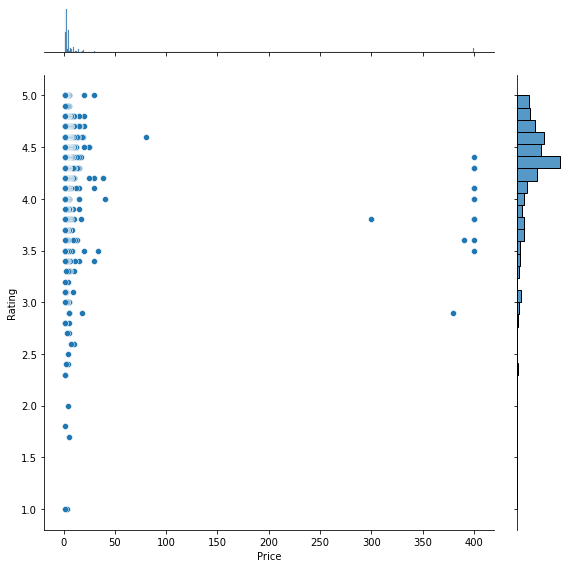

In [ ]:
#  a jointPlot of Rating vs Price

ratingvsprice = sns.jointplot(x = paid_app ['Price'], y = paid_app ['Rating'],kind='scatter',height=8, ratio=7, space=0.5)

## 7. Relation between app category and app price

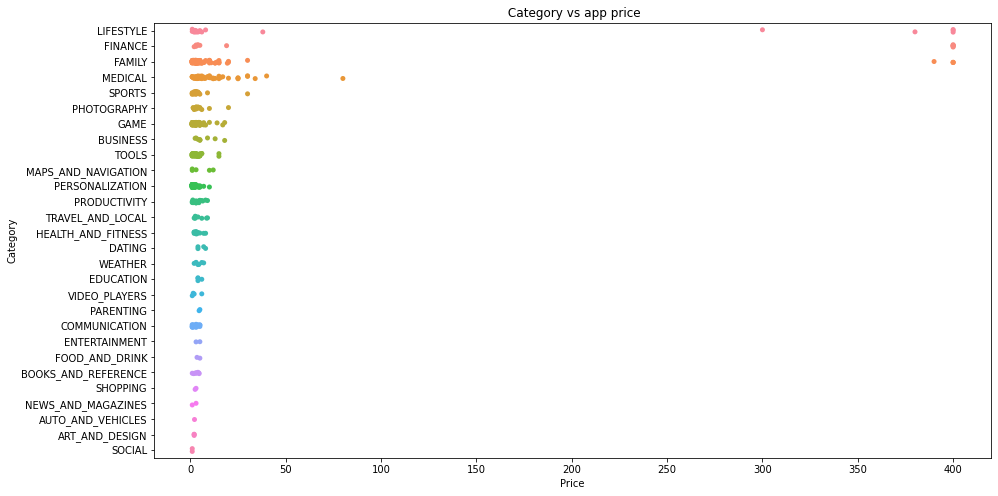

In [ ]:
plt.figure(figsize=(15, 8))
categoryvsapp = sns.stripplot(x='Price', y = 'Category', data =paid_app,size=5)
plt.title(' Category vs app price')
plt.show()

In [ ]:
#apps greater than $200
Apps_price_200 = paid_app[paid_app['Price']>200]
Apps_price_200

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5369,I am Rich,FINANCE,4.3,180,3.8M,5000.0,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up


In [ ]:
#selected a particular columns of apps greater tha $200
Apps_price_morethan200_selected = Apps_price_200.iloc[:,[0,1,7]]
Apps_price_morethan200_selected

,App,Category,Price
4367,I'm Rich - Trump Edition,LIFESTYLE,400.00
5359,I am rich(premium),FINANCE,399.99
5354,I am Rich Plus,FAMILY,399.99
5351,I am rich,LIFESTYLE,399.99
5356,I Am Rich Premium,FINANCE,399.99
5358,I am Rich!,FINANCE,399.99
5362,I Am Rich Pro,FAMILY,399.99
5364,I am rich (Most expensive app),FINANCE,399.99
5369,I am Rich,FINANCE,399.99
5373,I AM RICH PRO PLUS,FINANCE,399.99


In [ ]:
#popular app categories
popular_app_cats = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
popular_app_cats

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,Varies with device,10000000.0,Free,0.0,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,Varies with device,50000000.0,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,Varies with device,10000000.0,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29M,5000000.0,Free,0.0,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,Varies with device,1000000.0,Free,0.0,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10.0,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


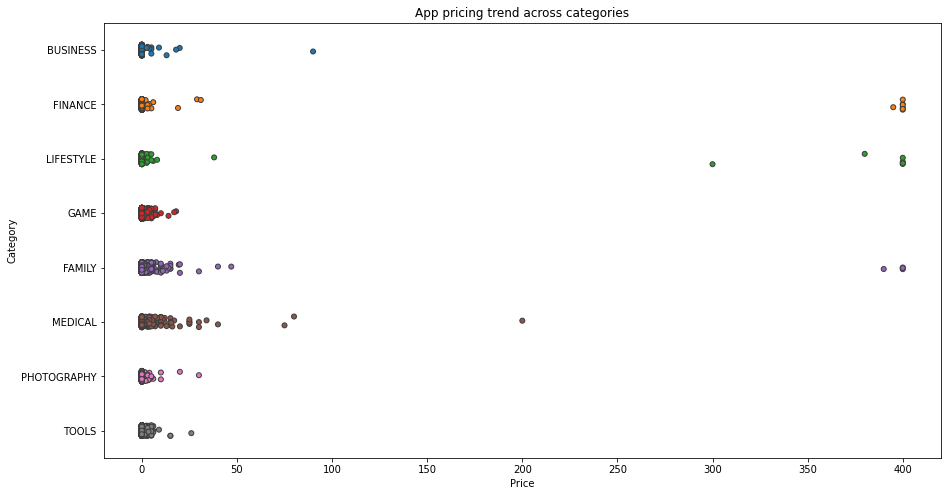

In [ ]:
 #Examining the price trend by plotting Price vs Category of the popular app
 plt.figure(figsize=(15, 8))
 ax= sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
plt.show()

### 8. Filter out "junk" apps

In [ ]:
#selecting app less than $100
app_priced_below100 =paid_app[paid_app['Price']<100]
app_priced_below100

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1.3M,100.0,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1.8M,1000.0,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68M,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2298,PTA Content Master,MEDICAL,4.2,64,41M,1000.0,Paid,29.99,Everyone,Medical,"December 22, 2015",2.1,2.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,Color Changer Pro [root],PERSONALIZATION,4.5,69,951k,1000.0,Paid,0.99,Everyone,Personalization,"January 12, 2017",1.11,4.4 and up
6936,Hitman GO,FAMILY,4.6,84114,23M,500000.0,Paid,0.99,Everyone 10+,Puzzle,"July 5, 2018",1.13.108869,2.3.3 and up
6985,Trinomial Factoring Wizard,TOOLS,4.0,22,82k,1000.0,Paid,0.99,Everyone,Tools,"October 10, 2014",2.4,2.3 and up
7100,CA Speakers,LIFESTYLE,5.0,12,1.2M,100.0,Paid,0.99,Teen,Lifestyle,"March 25, 2014",1.0,3.0 and up


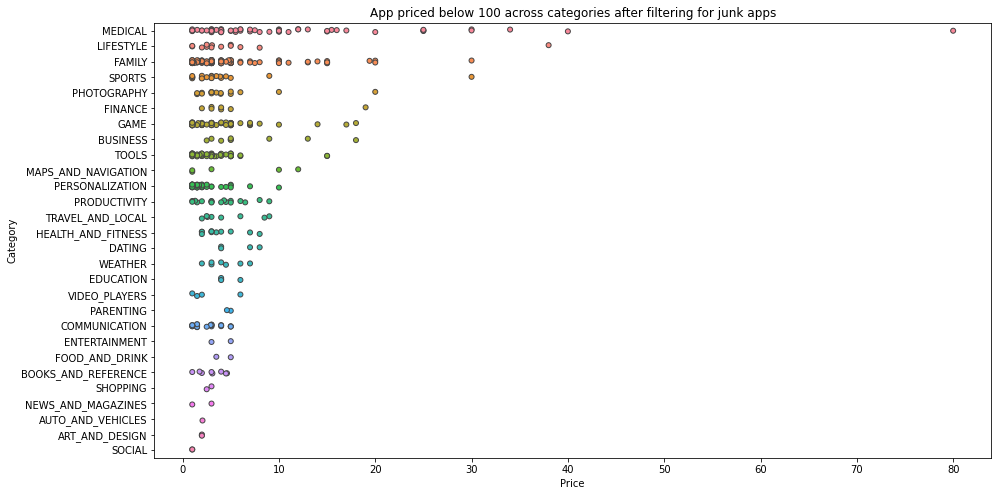

In [ ]:
#ploting the app categories below 100 dollars
plt.figure(figsize=(15, 8))
ax= sns.stripplot(x = app_priced_below100['Price'], y = app_priced_below100['Category'], jitter=True, linewidth=1)
ax.set_title('App priced below 100 across categories after filtering for junk apps')
plt.show()

## 9.Popularity of paid apps vs free apps

In [ ]:
#checking app price
App_price = df_noNaN.iloc[:,[0,1,5,6]]
App_price

,App,Category,Installs,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,10000.0,Free
1,Coloring book moana,ART_AND_DESIGN,500000.0,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5000000.0,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,50000000.0,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,100000.0,Free
...,...,...,...,...
10834,FR Calculator,FAMILY,500.0,Free
10836,Sya9a Maroc - FR,FAMILY,5000.0,Free
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,100.0,Free
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,1000.0,Free


In [ ]:
#subset data of apps that are free
App_price_Free = App_price[App_price['Type']=='Free']
App_price_Free

,App,Category,Installs,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,10000.0,Free
1,Coloring book moana,ART_AND_DESIGN,500000.0,Free
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5000000.0,Free
3,Sketch - Draw & Paint,ART_AND_DESIGN,50000000.0,Free
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,100000.0,Free
...,...,...,...,...
10834,FR Calculator,FAMILY,500.0,Free
10836,Sya9a Maroc - FR,FAMILY,5000.0,Free
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,100.0,Free
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,1000.0,Free


In [ ]:
#subset data of apps that are paid
App_price_Paid = App_price[App_price['Type']=='Paid']
App_price_Paid

,App,Category,Installs,Type
234,TurboScan: scan documents and receipts in PDF,BUSINESS,100000.0,Paid
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,100000.0,Paid
427,Puffin Browser Pro,COMMUNICATION,100000.0,Paid
476,"Moco+ - Chat, Meet People",DATING,10000.0,Paid
477,Calculator,DATING,1000.0,Paid
...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,100.0,Paid
10697,Mu.F.O.,GAME,1.0,Paid
10760,Fast Tract Diet,HEALTH_AND_FITNESS,1000.0,Paid
10782,Trine 2: Complete Story,GAME,10000.0,Paid


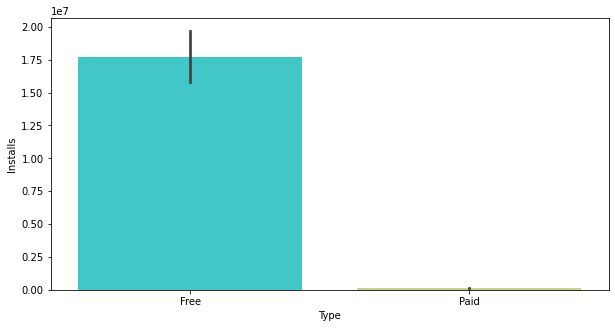

In [ ]:
# to check the app type that are mostly installed
plt.figure(figsize=(10, 5))
sns.barplot(x= 'Type', y= 'Installs',  data = App_price , palette ='rainbow')
plt.show()

### 10. Sentiment analysis of user reviews

In [ ]:
# app data url
url_review = 'https://github.com/adeyeyesaidah/googleplaystore/blob/main/googleplaystore_user_reviews.csv?raw=true'

In [ ]:
#reading the review data as df_review
df_review = pd.read_csv(url_review)

In [ ]:
#checking the head of the data
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# merging the two data sets on the app column
df_merged =  df.merge(df_review[['App','Translated_Review','Sentiment',	'Sentiment_Polarity',	'Sentiment_Subjectivity']])
df_merged

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100214,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
100215,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN
100216,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200,0.200000
100217,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000,0.000000


In [ ]:
#droping the NaN value
df_merged = df_merged.dropna(subset = ['Sentiment', 'Reviews'])
df_merged

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100203,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
100209,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
100216,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
100217,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

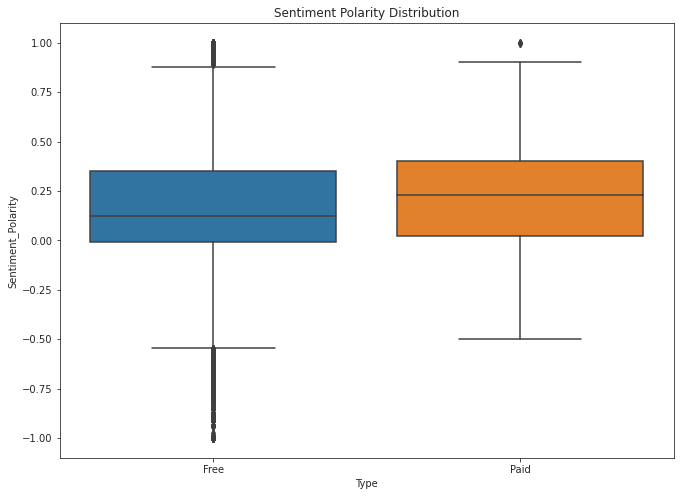

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y ='Sentiment_Polarity', data =df_merged)
ax.set_title('Sentiment Polarity Distribution')

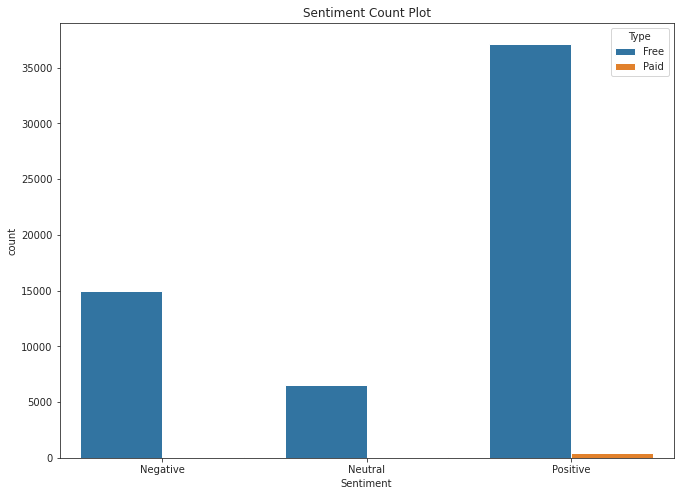

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.countplot(x = 'Sentiment',hue='Type', data =df_merged)
ax.set_title('Sentiment Count Plot')
plt.show()

In [ ]:
df_merged_Paid = df_merged[df_merged['Type']=='Paid']
df_merged_Paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
55357,Farming Simulator 18,GAME,4.5,18125,15M,100000.0,Paid,4.99,Everyone,Simulation;Education,"July 9, 2018",Varies with device,4.4 and up,"Great game!!!!! When I got game great, recentl...",Negative,-0.209091,0.631818
55358,Farming Simulator 18,GAME,4.5,18125,15M,100000.0,Paid,4.99,Everyone,Simulation;Education,"July 9, 2018",Varies with device,4.4 and up,"Very good, better graphics would better (more ...",Positive,0.552000,0.586000
55359,Farming Simulator 18,GAME,4.5,18125,15M,100000.0,Paid,4.99,Everyone,Simulation;Education,"July 9, 2018",Varies with device,4.4 and up,"Love game, gyroscope controls work. It gets st...",Positive,0.215238,0.451429
55360,Farming Simulator 18,GAME,4.5,18125,15M,100000.0,Paid,4.99,Everyone,Simulation;Education,"July 9, 2018",Varies with device,4.4 and up,I enjoy game. But I can't write proper review ...,Negative,-0.094805,0.350649
55361,Farming Simulator 18,GAME,4.5,18125,15M,100000.0,Paid,4.99,Everyone,Simulation;Education,"July 9, 2018",Varies with device,4.4 and up,Great game play far best farm sim problem phon...,Positive,0.300000,0.510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89025,BIG Launcher,PERSONALIZATION,4.3,881,5.9M,10000.0,Paid,9.99,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up,Amazing app. Thanks developers wonderful app.,Positive,0.600000,0.700000
89026,BIG Launcher,PERSONALIZATION,4.3,881,5.9M,10000.0,Paid,9.99,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up,Superb Awesome app.very easy use.,Positive,0.811111,0.944444
89027,BIG Launcher,PERSONALIZATION,4.3,881,5.9M,10000.0,Paid,9.99,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up,Love simple easy-to-use,Positive,0.250000,0.478571
89028,BIG Launcher,PERSONALIZATION,4.3,881,5.9M,10000.0,Paid,9.99,Everyone,Personalization,"June 20, 2018",2.5.9,2.1 and up,Black Friday Deal Sonny Been waiting deal moth...,Positive,0.016667,0.316667


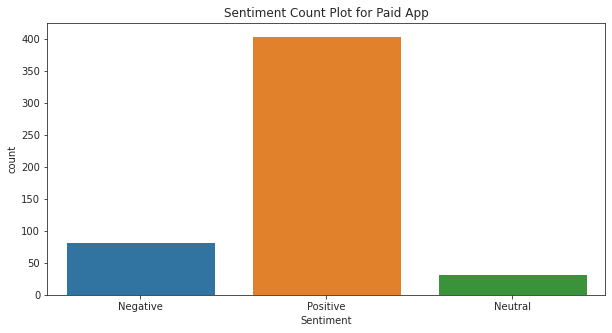

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.countplot(x = 'Sentiment', data =df_merged_Paid )
ax.set_title('Sentiment Count Plot for Paid App')
plt.show()

In [ ]:
df_merged_Free= df_merged[df_merged['Type']=='Free']
df_merged_Free

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100203,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
100209,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
100216,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
100217,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


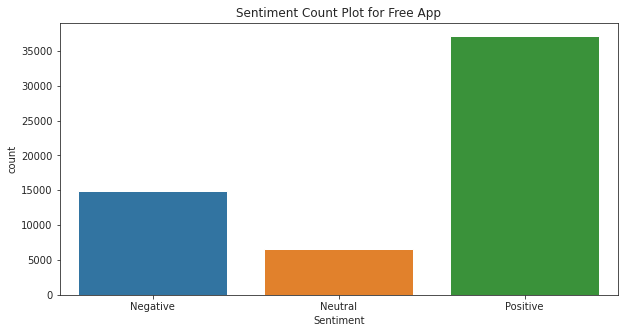

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.countplot(x = 'Sentiment', data =df_merged_Free )
ax.set_title('Sentiment Count Plot for Free App')
plt.show()

### **THE** **END**